1. Gerekli kütüphaneler

In [7]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from collections import Counter

2. Veriyi okuma

In [8]:
# Verileri oku
train_df = pd.read_csv("../datasets/pca/train_mental_pca.csv")
test_df = pd.read_csv("../datasets/pca/test_mental_pca.csv")

# Özellik ve hedef ayır (✅ doğru hedef sütunu kullanılıyor)
X_train = train_df.drop("support_needed", axis=1)
y_train = train_df["support_needed"]

X_test = test_df.drop("support_needed", axis=1)
y_test = test_df["support_needed"]

print("✅ Eğitim verisi:", X_train.shape)
print("✅ Test verisi:", X_test.shape)
print("🎯 Sınıf dağılımı (y_train):\n", y_train.value_counts())

✅ Eğitim verisi: (1007, 23)
✅ Test verisi: (252, 23)
🎯 Sınıf dağılımı (y_train):
 support_needed
0    528
1    479
Name: count, dtype: int64


In [9]:
# 🔄 SMOTE ile dengeleme
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("🎯 Yeni sınıf dağılımı:", Counter(y_train_balanced))

🎯 Yeni sınıf dağılımı: Counter({0: 528, 1: 528})


3. Karar Ağacı modeli

In [10]:
# Modeli oluştur ve eğit
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_balanced, y_train_balanced)

DecisionTreeClassifier(random_state=42)

4. Tahmin

In [11]:
# Tahminler
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

5. Değerlendirme

📋 Sınıflandırma Raporu (Decision Tree):

              precision    recall  f1-score   support

           0       0.72      0.64      0.68       132
           1       0.65      0.73      0.69       120

    accuracy                           0.68       252
   macro avg       0.69      0.68      0.68       252
weighted avg       0.69      0.68      0.68       252



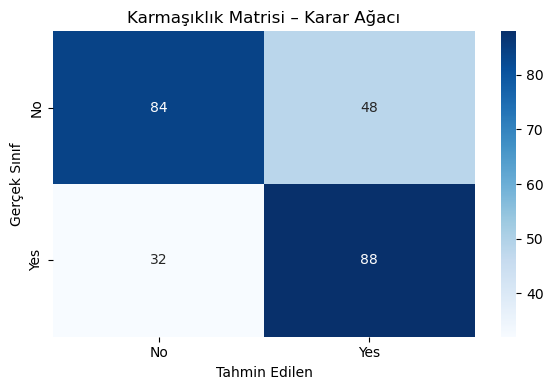

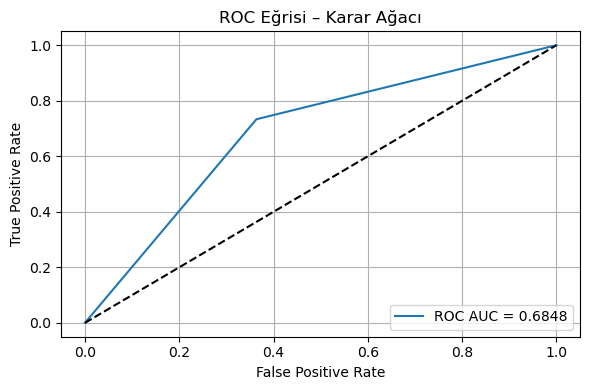

In [12]:
# Sınıflandırma raporu
print("📋 Sınıflandırma Raporu (Decision Tree):\n")
print(classification_report(y_test, y_pred))

# Karmaşıklık matrisi
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("Karmaşıklık Matrisi – Karar Ağacı")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek Sınıf")
plt.tight_layout()
plt.show()

# ROC Eğrisi
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Eğrisi – Karar Ağacı")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()